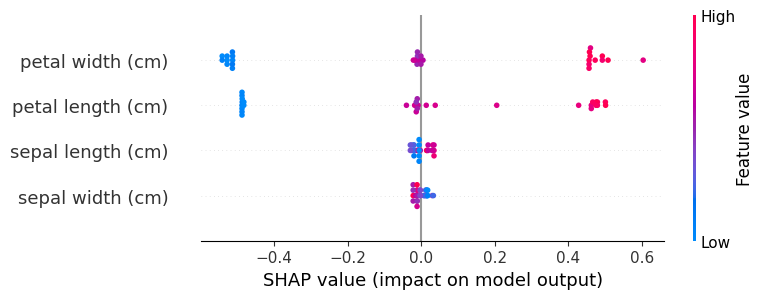

In [1]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from shap import partial_dependence_plot
# Wczytaj dane
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenuj model RandomForest
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Utwórz obiekt Explainer SHAP dla danych testowych
explainer = shap.Explainer(model, X_test)

# Oblicz wartości SHAP
shap_values = explainer.shap_values(X_test)

# Wyświetl wykres SHAP dla pierwszej obserwacji
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


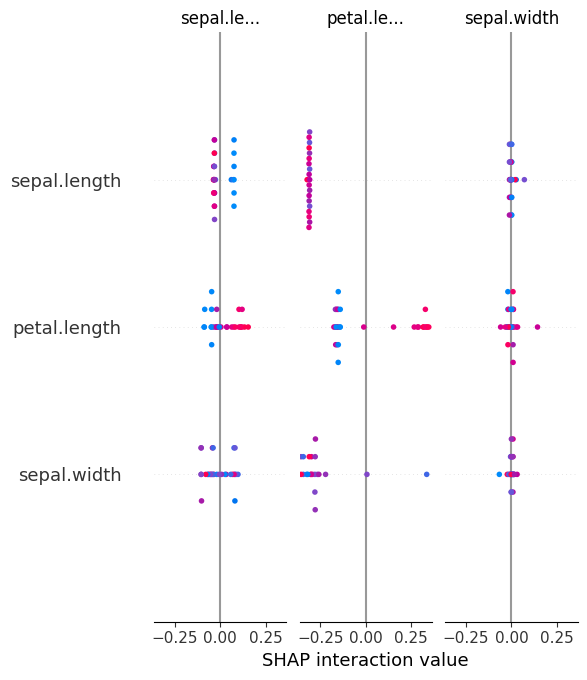

(30, 4, 3)
(4,)
Class Setosa:


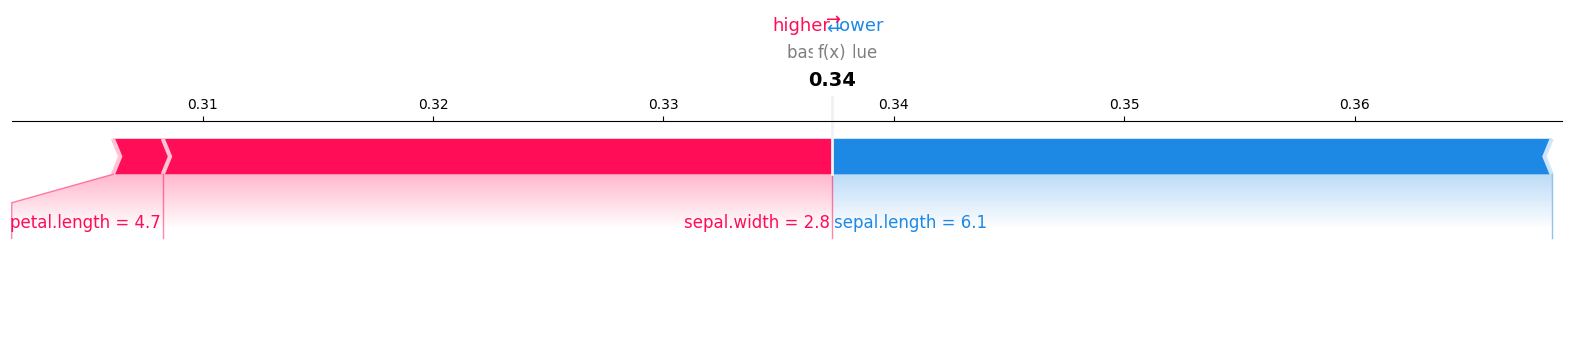

Class Versicolor:


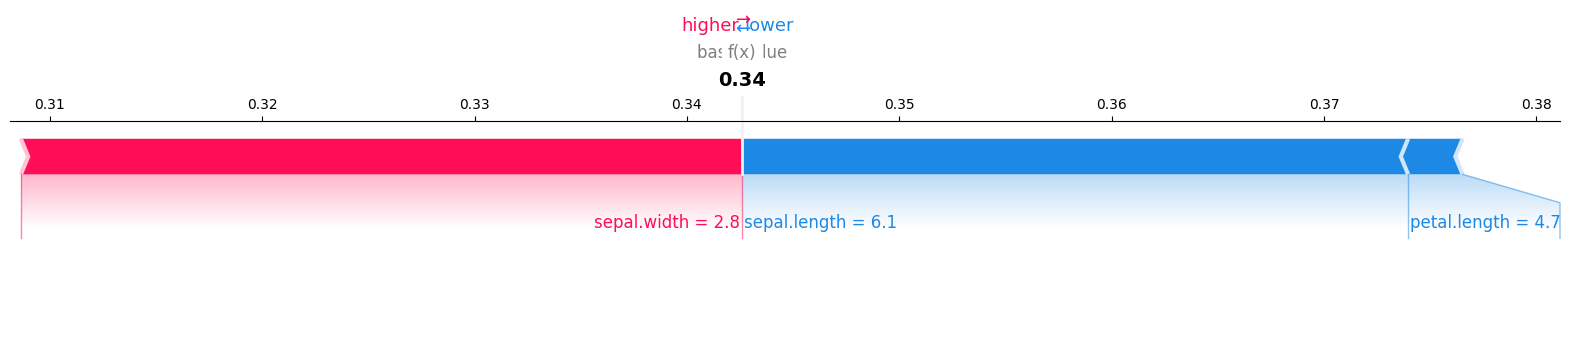

Class Virginica:


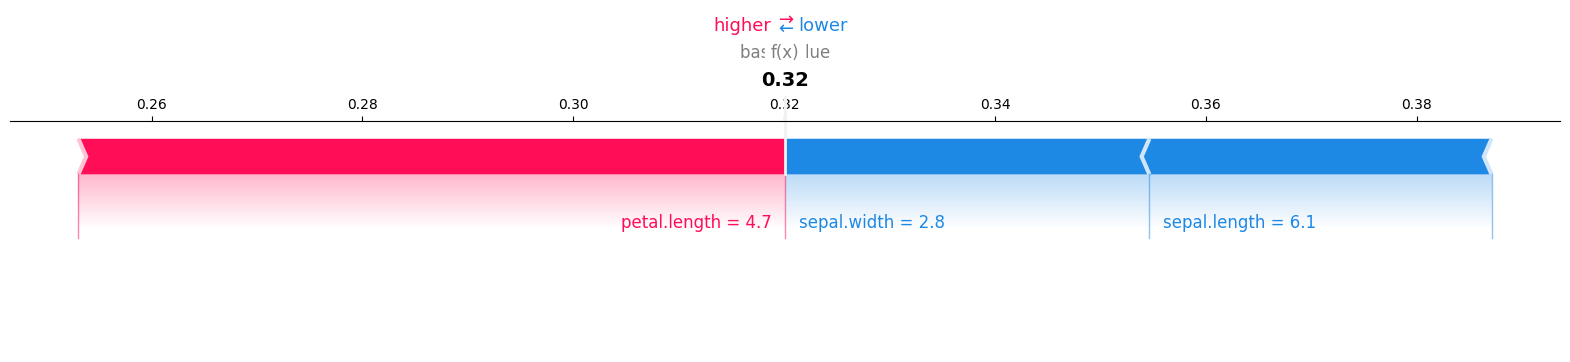

In [49]:
# Importowanie potrzebnych bibliotek
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Wczytanie danych
iris = pd.read_csv('iris.csv')

# Podział danych na zmienne niezależne (X) i zależne (y)
X = iris.drop('species', axis=1)
y = iris['species']
class_names = ["Setosa", "Versicolor", "Virginica"]


# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie i trenowanie modelu klasyfikacji
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Utworzenie obiektu explainera SHAP
explainer = shap.TreeExplainer(model)

# Obliczenie wartości SHAP dla zbioru testowego
shap_values = explainer.shap_values(X_test)

# Wyświetlenie podsumowania wartości SHAP
# shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Generowanie force_plot dla wszystkich klas dla wybranej obserwacji
shap.initjs()
observation_index = 0

print(shap_values.shape)
print(X_test.iloc[observation_index].shape)
for class_index in range(len(class_names)):
    print(f"Class {class_names[class_index]}:")
    shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index][observation_index], 
        X_test.iloc[observation_index, :-1],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True,
        #link="logit"
    )



In [3]:
explainer = shap.explainers.Exact(model.predict_proba, X)
shap_values = explainer(X)

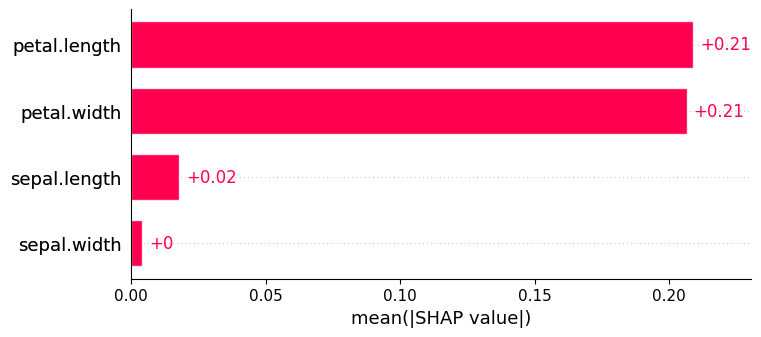

In [17]:
shap_values = shap_values[..., 0]
shap.plots.bar(shap_values)

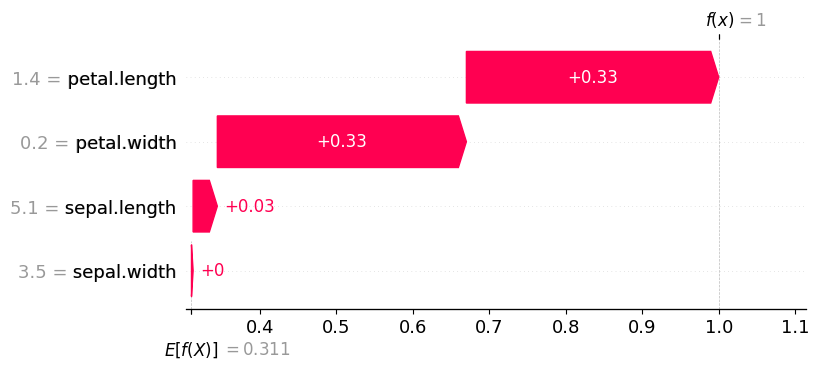

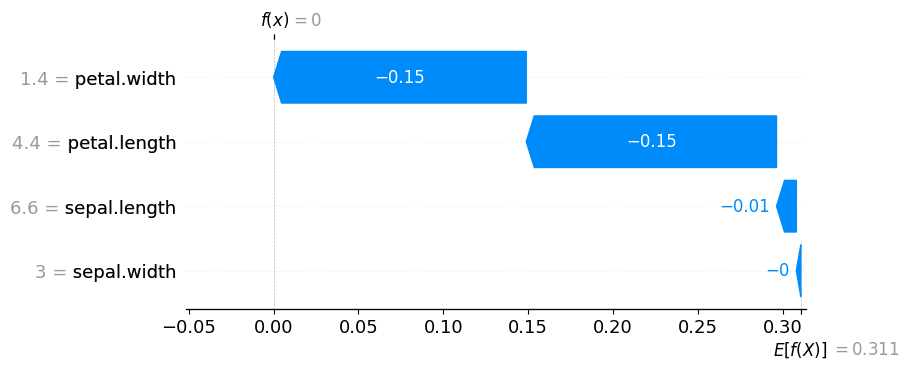

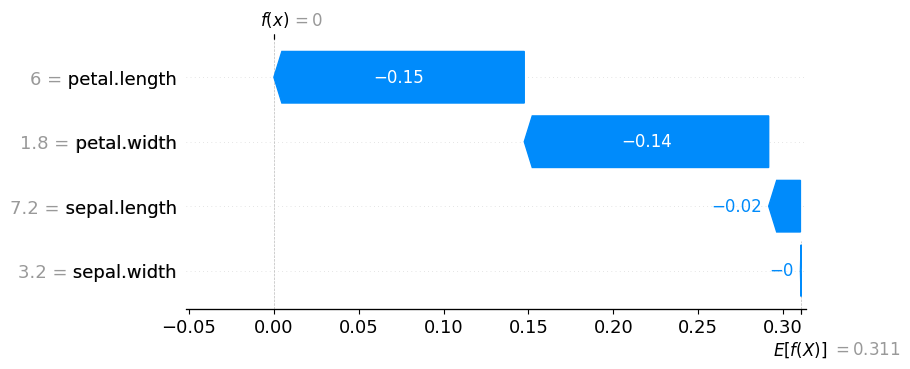

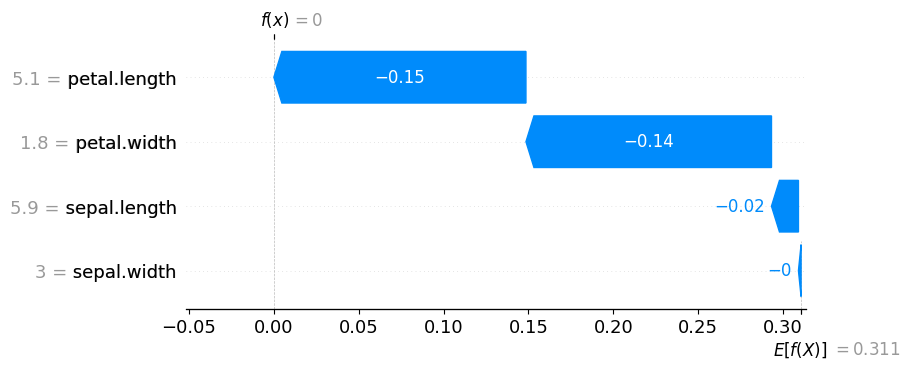

In [18]:

shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[75])
shap.plots.waterfall(shap_values[125])
shap.plots.waterfall(shap_values[149])

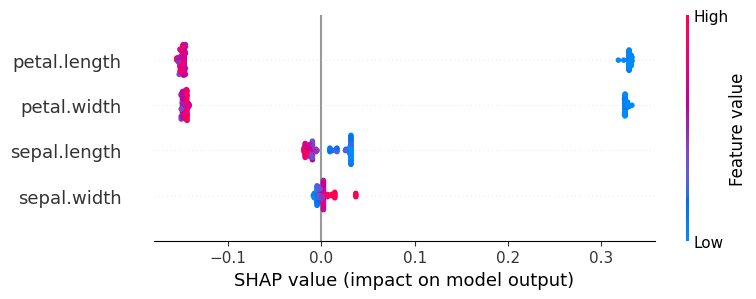

In [19]:
shap.summary_plot(shap_values)

In [25]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

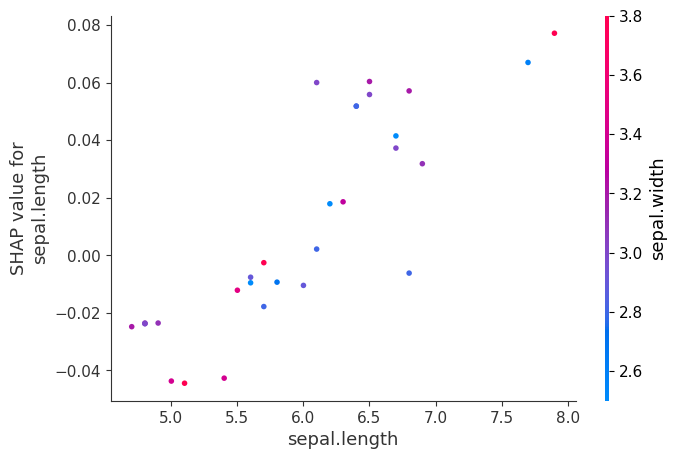

In [26]:
shap.dependence_plot("sepal.length", shap_values[:, :, 2], X_test,interaction_index="sepal.width")

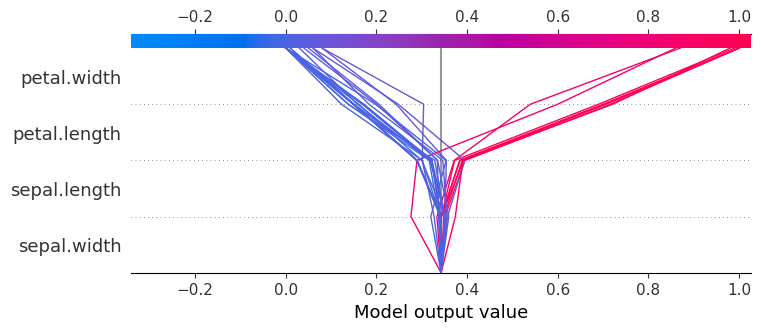

In [27]:
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)

In [55]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from shap import partial_dependence_plot

# Dane (serce) są już załadowane, zakładając, że X i y są poprawne
serce = pd.read_csv('serce.csv')
X = serce.drop('diagnoza', axis=1)
y = serce['diagnoza']
class_names = ["1", "2"]

# Podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Zmień model na RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Utwórz obiekt Explainer SHAP dla danych testowych
explainer = shap.TreeExplainer(model)

# Oblicz wartości SHAP dla każdej klasy
shap_values = explainer.shap_values(X_test)

print("Liczba obserwacji w zestawie testowym:", len(X_test))
class_index = 1 # lub 1 w zależności od klasy, którą chcesz analizować
observation_index = 1  # Wskaż, którą obserwację chcesz zobaczy
print(shap_values.shape)
print(X_test.iloc[observation_index].shape)
# Wyświetl wykres SHAP dla wybranej obserwacji
shap.force_plot(
    explainer.expected_value[class_index],  # Wartość oczekiwana dla danej klasy
    shap_values[class_index][observation_index],  # Wartości SHAP dla tej klasy i obserwacji
    X_test.iloc[observation_index, :-1],  # Wartości cech dla wybranej obserwacji
    feature_names=class_names,
    show=True
)
shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index][observation_index], 
        X_test.iloc[observation_index, :-1],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True,
        #link="logit"
    )

Liczba obserwacji w zestawie testowym: 54
(54, 13, 2)
(13,)


DimensionError: Length of features is not equal to the length of shap_values!

(30, 4, 3)
(4,)
Class Setosa:


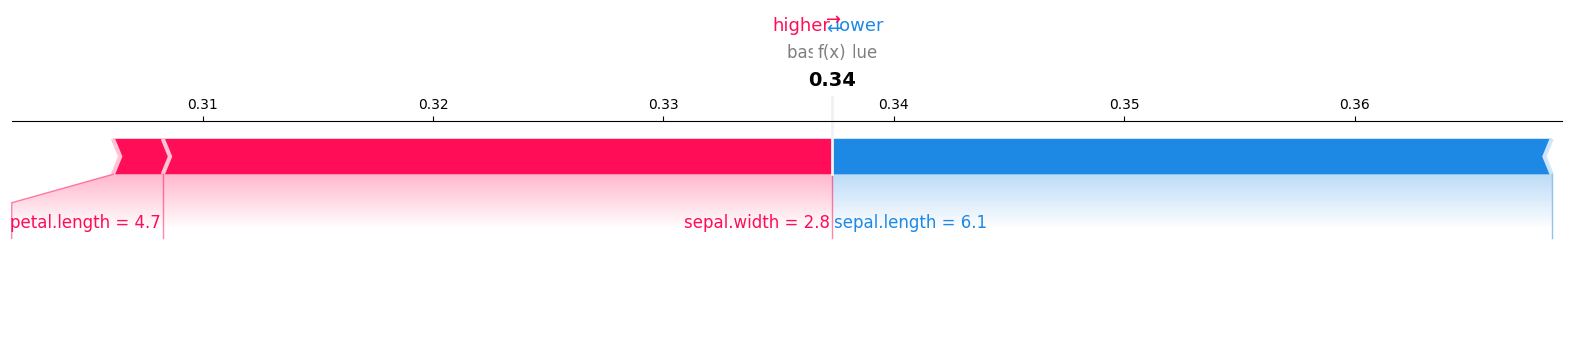

Class Versicolor:


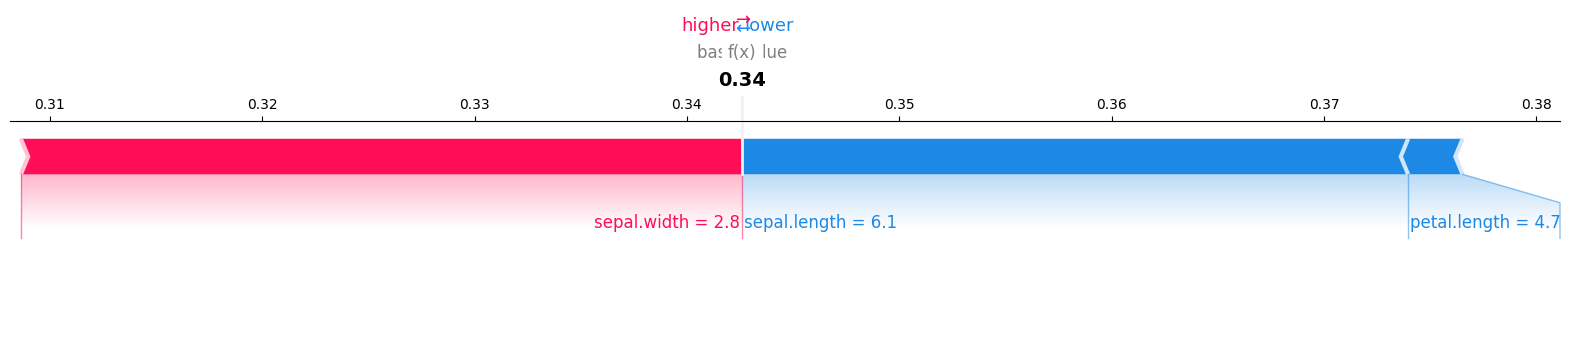

Class Virginica:


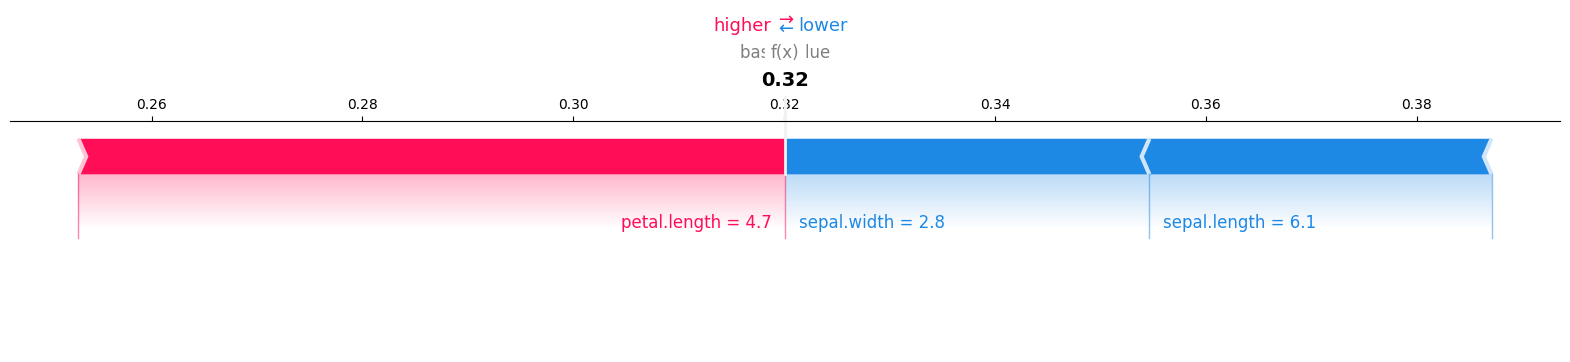

In [56]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = pd.read_csv('iris.csv')

X = iris.drop('species', axis=1)
y = iris['species']
class_names = ["Setosa", "Versicolor", "Virginica"]

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie i trenowanie modelu klasyfikacji
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Utworzenie obiektu explainera SHAP
explainer = shap.TreeExplainer(model)

# Obliczenie wartości SHAP dla zbioru testowego
shap_values = explainer.shap_values(X_test)

# Generowanie force_plot dla wszystkich klas dla wybranej obserwacji
shap.initjs()
observation_index = 0
for class_index in range(len(class_names)):
    print(f"Class {class_names[class_index]}:")
    shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index][observation_index], 
        X_test.iloc[observation_index, :-1],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True,
    )



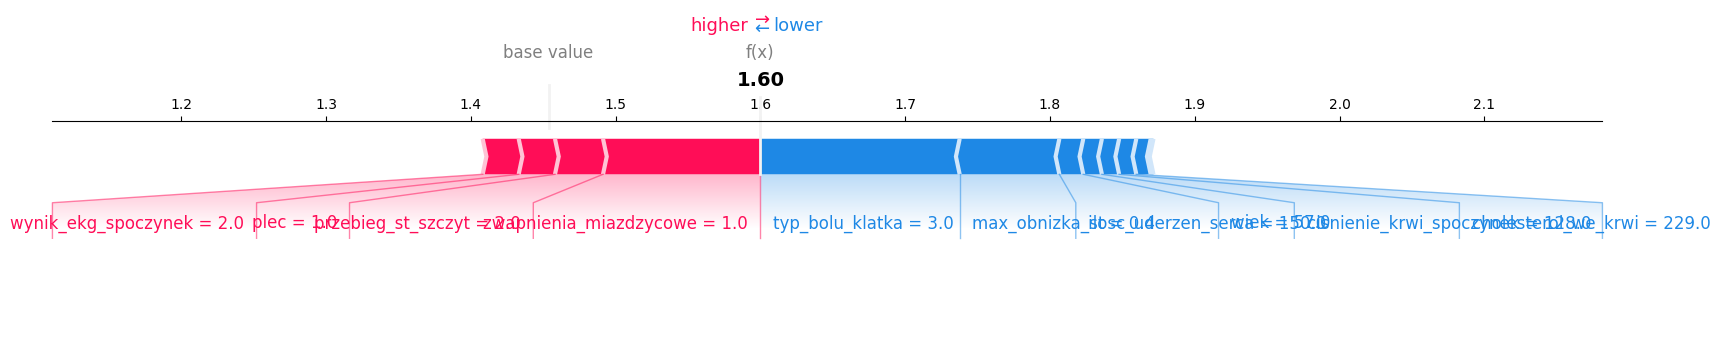

In [15]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from shap import partial_dependence_plot

serce = pd.read_csv('serce.csv')
X = serce.drop('diagnoza', axis=1)
y = serce['diagnoza']
class_names = ["1", "2"]

# Podziel dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenuj model RandomForest
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
# model = RandomForestClassifier(n_estimators=10, random_state=42)
# model.fit(X_train, y_train)
# Utwórz obiekt Explainer SHAP dla danych testowych
explainer = shap.TreeExplainer(model)

# Oblicz wartości SHAP
shap_values = explainer.shap_values(X_test)

# Wyświetl wykres SHAP dla pierwszej obserwacji
#shap.summary_plot(shap_values, X_test, feature_names=class_names)
shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index], 
        X_test.iloc[observation_index],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True
)


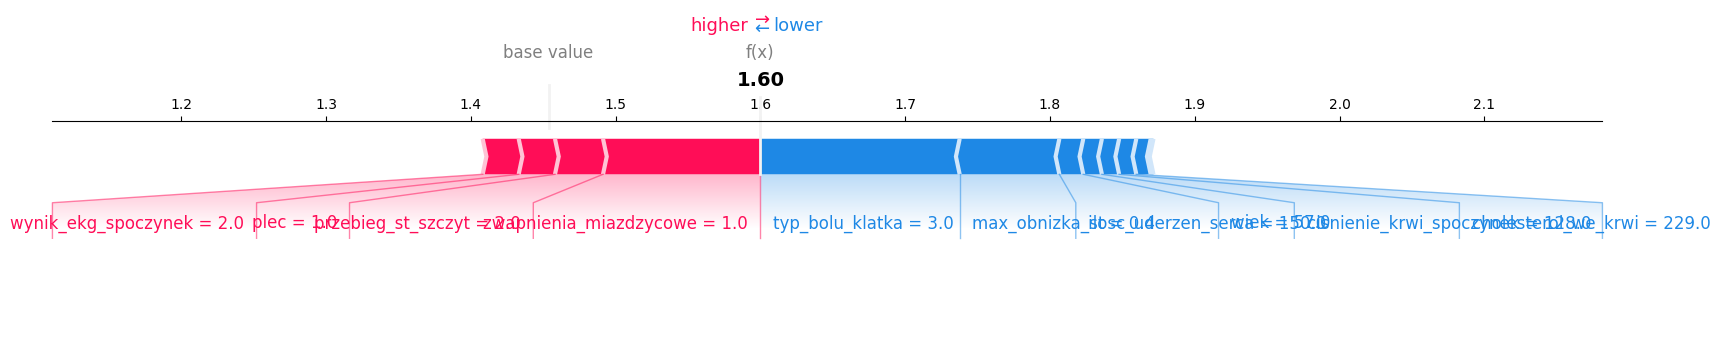

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

shap.force_plot(
        explainer.expected_value[class_index], 
        shap_values[class_index], 
        X_test.iloc[observation_index],
        feature_names=X_test.columns[:-1],
        show=True,
        matplotlib=True
)

In [22]:
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[0][1], 
    X_test.iloc[1,:-1],
    feature_names=X_test.columns[:-1],
    show=True,
    matplotlib=True,
)

ValueError: visualize() can only display Explanation objects (or arrays of them)!